In [ ]:
# Import library
import pandas as pd
import numpy as np
from IPython.display import display
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **1. <span style='color:#E1B12D'>LOAD DATA </span>**

In [ ]:
# Download data from Google Drive
!gdown --id 1wg4vHsB_X3Qvv-Y6DSHAiSbTCkVereHH

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wg4vHsB_X3Qvv-Y6DSHAiSbTCkVereHH
To: /content/df2_processed(2).csv
100% 9.22M/9.22M [00:00<00:00, 69.7MB/s]


In [ ]:
df = pd.read_csv('df2_processed(2).csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,default_loan_interaction,housing_loan_interaction,default_housing_loan_interaction,duration_prev_interaction,contact_quarter,emp.var.rate_bin,cons.price.idx_bin,cons.conf.idx_bin,euribor3m_bin,nr.employed_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,261.0,2,> 1,93 - 94,-40 - (-35),> 4.5,5100 - 5200
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no_no,yes_no,no_yes_no,226.0,2,> 1,93 - 94,-40 - (-35),> 4.5,5100 - 5200
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,151.0,2,> 1,93 - 94,-40 - (-35),> 4.5,5100 - 5200
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no_yes,no_yes,no_no_yes,307.0,2,> 1,93 - 94,-40 - (-35),> 4.5,5100 - 5200
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,no_no,no_no,no_no_no,139.0,2,> 1,93 - 94,-40 - (-35),> 4.5,5100 - 5200


# **2. <span style='color:#E1B12D'> BUSINESS INSIGHT </span>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                30478 non-null  int64  
 1   job                                30478 non-null  object 
 2   marital                            30478 non-null  object 
 3   education                          30478 non-null  object 
 4   default                            30478 non-null  object 
 5   housing                            30478 non-null  object 
 6   loan                               30478 non-null  object 
 7   contact                            30478 non-null  object 
 8   month                              30478 non-null  object 
 9   day_of_week                        30478 non-null  object 
 10  duration                           30478 non-null  int64  
 11  campaign                           30478 non-null  int

## **2.1 How Does Age Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Define English translations for 'age_bin'
age_bin_translation = {
    'Muda': 'Young',
    'Dewasa': 'Adult',
    'Dewasa Tua': 'Mature Adult',
    'Tua': 'Old',
    'Lansia': 'Senior'
}

# Apply the translation to the 'age_bin' column
df['age_bin_translated'] = df['age_bin'].map(age_bin_translation)

# Calculating the count of each translated age bin against the target variable
pivot_table = pd.pivot_table(
    df,
    values='age',
    index='age_bin_translated',
    columns='y',
    aggfunc='count',
    fill_value=0
)

# Adding a 'Total' column for the count of each age bin
pivot_table['Total'] = pivot_table['no'] + pivot_table['yes']

# Calculating the percentage of 'yes' and 'no' against the total
pivot_table['no_percentage'] = (pivot_table['no'] / pivot_table['Total']) * 100
pivot_table['yes_percentage'] = (pivot_table['yes'] / pivot_table['Total']) * 100

# Displaying a pivot table with percentages
pivot_table[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
age_bin_translated,,,,,
Adult,12247,1571,13818,88.630771,11.369229
Mature Adult,6832,715,7547,90.526037,9.473963
Old,3967,530,4497,88.214365,11.785635
Senior,725,422,1147,63.208370,36.791630
Young,2849,620,3469,82.127414,17.872586


In [ ]:
# Data from pivot_table
age_bins = pivot_table.index
no_counts = pivot_table['no']
yes_counts = pivot_table['yes']
total_counts = no_counts + yes_counts

# Sorting data by total count
sorted_indices = total_counts.sort_values().index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]

# Membuat histogram untuk jumlah
fig = go.Figure()

# Adding a histogram for the 'No' count
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_counts,
    name='No (Jumlah)',
    orientation='h',
    marker_color='#98FB98',
    text=sorted_no_counts,
    textposition='inside'
))

# Adding a histogram for the 'Yes' count
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_counts,
    name='Yes (Jumlah)',
    orientation='h',
    marker_color='#006400',
    text=sorted_yes_counts,
    textposition='inside'
))

# Setting the layout for the counts
fig.update_layout(
    title='Number of Customers by Age Category and Response Status',
    xaxis_title='Total',
    yaxis_title='Age Category',
    barmode='stack',
    height=300,
    width=1300,
    margin=dict(l=40, r=40, t=40, b=40),
    yaxis=dict(tickfont=dict(size=10))
)

# Displaying the plot
fig.show()


In [ ]:
# Data from pivot_table
age_bins = pivot_table.index
no_counts = pivot_table['no']
yes_counts = pivot_table['yes']

# Creating subplots with the number of pie charts equal to the number of age bins
fig = make_subplots(rows=1, cols=len(age_bins), specs=[[{'type':'domain'}]*len(age_bins)])

# Colors for 'No' and 'Yes'
colors = ['#4a90e2', '#b7e4d9']

# Adding pie chart for each age bin
for i, age_bin in enumerate(age_bins):
    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[no_counts[age_bin], yes_counts[age_bin]],
        name=age_bin,
        hole=0.4,  # To create a donut chart
        textinfo='label+percent+value',  # Displaying labels, percentages, and values
        hoverinfo='label+value',
        title=age_bin,  # Displaying age_bin as the title for each pie chart
        marker=dict(colors=colors)  # Using specified colors
    ), row=1, col=i + 1)

# Setting layout
fig.update_layout(
    title_text="Percentage of Yes/No Responses by Age Category",
    height=400,
    showlegend=True  # Displaying legend
)

# Displaying plot
fig.show()


**Explanation**

Based on the available data, we observe that in terms of absolute numbers, the Adult category (ages 30-40) has the highest number of customers responding "yes" and "no." However, when analyzed by the percentage of the total in each age category, it is evident that the Senior category (ages 60 and above) has a higher percentage of customers choosing "yes" compared to other age categories.

This indicates that, although their absolute numbers are smaller, the proportion of Senior customers interested in the offer or product is much more significant than in other age groups. The age ranges are grouped as follows:

- **<30**: Under 30 years old (Young)
- **30-40**: Ages 30 to 39 (Adult)
- **40-50**: Ages 40 to 49 (Mature Adult)
- **50-60**: Ages 50 to 59 (Old)
- **>=60**: Ages 60 and above (Senior)

**Analysis**

During the Portuguese economic crisis of 2008-2014, the impact varied across age groups. The Senior group (ages 60 and above) showed a higher percentage of interest in the offers, despite having smaller absolute numbers. This may be due to:

1. **Financial Security**: Seniors often have adequate pensions or savings, making them more prepared to invest in products that enhance their quality of life.
2. **Consumption Priorities**: During the crisis, Seniors may have been more focused on products offering additional comfort and security.

On the other hand, younger age groups, such as the "Young" (under 30), may have been more affected by economic uncertainty and less interested in additional offers.

## **2.2 How Does Occupation Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each job against the target variable
pivot_job_y = pd.pivot_table(
    df,
    index='job',
    columns='y',
    aggfunc='size',  # Calculating the number of rows for each combination of job and y
    fill_value=0
)

# Adding a 'Total' column for the count of each job
pivot_job_y['Total'] = pivot_job_y['no'] + pivot_job_y['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_job_y['no_percentage'] = (pivot_job_y['no'] / pivot_job_y['Total']) * 100
pivot_job_y['yes_percentage'] = (pivot_job_y['yes'] / pivot_job_y['Total']) * 100

# Displaying a pivot table with percentages
pivot_job_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
job,,,,,
admin.,7519,1215,8734,86.088848,13.911152
blue-collar,5222,452,5674,92.033839,7.966161
entrepreneur,988,101,1089,90.725436,9.274564
housemaid,603,87,690,87.391304,12.608696
management,2025,286,2311,87.624405,12.375595
retired,858,357,1215,70.617284,29.382716
self-employed,960,132,1092,87.912088,12.087912
services,2598,258,2856,90.966387,9.033613
student,407,203,610,66.721311,33.278689


In [ ]:
# Data
jobs = pivot_job_y.index
no_counts = pivot_job_y['no']
yes_counts = pivot_job_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_job_y['no_percentage'].round(1)  # Rounding to 1 decimal place

yes_percentages = pivot_job_y['yes_percentage'].round(1)

# Sorting data by total count
sorted_indices = total_counts.sort_values().index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Creating a histogram for the total count
fig = go.Figure()

# Adding a histogram for the 'No' count
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_counts,
    name='No (Total)',
    orientation='h',
    marker_color='#5a9bd4',
    text=sorted_no_counts,
    textposition='inside'
))

# Adding a histogram for the 'Yes' count
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_counts,
    name='Yes (Total)',
    orientation='h',
    marker_color='#2C5F2D',
    text=sorted_yes_counts,
    textposition='inside'
))

# Setting the layout for the counts
fig.update_layout(
    title='Number of Customers by Occupation and Response Status',
    xaxis_title='Total',
    yaxis_title='Occupation',
    barmode='stack',
    xaxis=dict(
        tickvals=[0, max(total_counts)],
        ticktext=[f'0', f'{max(total_counts)}']
    ),
    yaxis=dict(
        tickvals=sorted_indices,
        ticktext=[f"{job}" for job in sorted_indices]
    )
)

# Displaying the plot
fig.show()


In [ ]:
# Data
jobs = pivot_job_y.index
no_counts = pivot_job_y['no']
yes_counts = pivot_job_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_job_y['no_percentage'].round(1)
yes_percentages = pivot_job_y['yes_percentage'].round(1)

# Sorting the data by 'Yes' percentage from largest to smallest
sorted_indices = yes_percentages.sort_values(ascending=False).index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Creating a histogram for the percentage
fig2 = go.Figure()

# Adding a histogram for the 'No' percentage
fig2.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_percentages,
    name='No (Persentase)',
    orientation='h',
    marker_color='#008080',
    text=sorted_no_percentages,
    textposition='inside'
))

# Adding a histogram for the 'Yes' percentage
fig2.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_percentages,
    name='Yes (Persentase)',
    orientation='h',
    marker_color='#228B22',
    text=sorted_yes_percentages,
    textposition='inside'
))

# Setting the layout for the percentage
fig2.update_layout(
    title='Percentage of Customers by Occupation and Response Status',
    xaxis_title='Percentage (%)',
    yaxis_title='Occupation',
    barmode='stack',
    xaxis=dict(
        tickvals=[0, 100],
        ticktext=[f'0%', f'100%']
    ),
    yaxis=dict(
        title='Occupation',
        tickvals=sorted_indices,
        ticktext=[f"{job}" for job in sorted_indices],
        autorange='reversed'  # Reversing the y-axis order so that the highest is at the top
    )
)

# Displaying the plot
fig2.show()


**Explanation**

1. **General Observations**:
   - **Top 3 by Count**: Admin, Blue-collar, and Entrepreneur have the largest counts in the dataset.
   - **Top 3 by Percentage**: Student, Retired, and Unemployed have the highest percentage of those making deposits. This shows that, although their numbers are smaller, the proportion of individuals making deposits is higher compared to other occupation categories.
   - **Retired**: Retired individuals show a high deposit percentage (29.38%).
 - **Saving Ability**: The higher deposit percentage in certain categories such as Student & Retired may indicate that individuals in these categories are more likely to set aside money for future needs or have more stable income sources (such as pensions) compared to other occupation categories.
 - **Economic and Job Conditions**: For occupation categories like Blue-collar and Services, the lower deposit percentage could be related to lower income and higher living costs, making it harder for them to save money.

## **2.3 How Does Marital Status Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each marital status against the target variable
pivot_marital_y = pd.pivot_table(
    df,
    index='marital',
    columns='y',
    aggfunc='size',  # Calculating the number of rows for each combination of marital status and y
    fill_value=0
)

# Adding a 'Total' column for the count of each marital status
pivot_marital_y['Total'] = pivot_marital_y['no'] + pivot_marital_y['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_marital_y['no_percentage'] = (pivot_marital_y['no'] / pivot_marital_y['Total']) * 100
pivot_marital_y['yes_percentage'] = (pivot_marital_y['yes'] / pivot_marital_y['Total']) * 100

# Displaying a pivot table with percentages
pivot_marital_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
marital,,,,,
divorced,3142,410,3552,88.457207,11.542793
married,15432,2055,17487,88.248413,11.751587
single,8046,1393,9439,85.242081,14.757919


In [ ]:
# Data
marital_status = pivot_marital_y.index
no_counts = pivot_marital_y['no']
yes_counts = pivot_marital_y['yes']
total_counts = no_counts + yes_counts
no_percentages = pivot_marital_y['no_percentage'].round(1)
yes_percentages = pivot_marital_y['yes_percentage'].round(1)

# Sorting data by total count
sorted_indices = total_counts.sort_values().index
sorted_no_counts = no_counts[sorted_indices]
sorted_yes_counts = yes_counts[sorted_indices]
sorted_no_percentages = no_percentages[sorted_indices]
sorted_yes_percentages = yes_percentages[sorted_indices]

# Creating subplots with 4 plots: a bar chart on top and 3 pie charts below
fig = make_subplots(
    rows=2, cols=3,
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar", "colspan": 3}, None, None],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    subplot_titles=[
        "Number of Customers by Marital Status and Response Status",
        f"{sorted_indices[0].capitalize()} ",
        f"{sorted_indices[1].capitalize()} ",
        f"{sorted_indices[2].capitalize()} "
    ],
    vertical_spacing=0.3
)

# Bar Chart (Total)
fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_no_counts,
    name='No (Jumlah)',
    orientation='h',
    marker_color='#00FFFF',
    text=sorted_no_counts,
    textposition='inside'
), row=1, col=1)

fig.add_trace(go.Bar(
    y=sorted_indices,
    x=sorted_yes_counts,
    name='Yes (Jumlah)',
    orientation='h',
    marker_color='#228B22',
    text=sorted_yes_counts,
    textposition='inside'
), row=1, col=1)

# Pie Charts for each marital status with dark blue and dark green colors
colors = ['#1f77b4', '#2ca02c']

for i, status in enumerate(sorted_indices[:3]):
    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[sorted_no_counts[status], sorted_yes_counts[status]],
        marker_colors=colors,
        textinfo='label+percent',
        hoverinfo='label+value',
        hole=.4
    ), row=2, col=i + 1)

# Setting the layout for the bar chart and pie charts
fig.update_layout(
    barmode='stack',
    xaxis_title='Total',
    yaxis_title='Status Marital',
    showlegend=False,
    font=dict(size=10),
    title_font=dict(size=12),
    margin=dict(t=60),\
)

# Adjusting the y-position of annotations to provide spacing
for annotation in fig['layout']['annotations']:
    annotation['yshift'] = 20
# Displaying the plot
fig.show()


* **Single**: The deposit percentage (14.8%) is the highest compared to other marital statuses. This suggests that individuals who are not married may be more inclined to set aside their money as deposits, possibly because they have fewer financial responsibilities compared to those who are married or divorced.

* **Married**: With a deposit percentage of 11.8%, slightly lower than singles but higher than divorced. This may reflect greater financial responsibilities, such as family and children, which could affect their ability to make deposits.

* **Divorced**: The deposit percentage (11.3%) is the lowest among the three marital statuses. This could be due to changes in financial situations following a divorce, which may impact their ability to make deposits.

* Although the number of married customers is significantly higher, their deposit percentage is not much different from that of divorced customers. This might indicate that marital status alone is not the only factor influencing the decision to make a deposit.

## **2.4 How Does Education Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each education level against the target variable
pivot_education_y = pd.pivot_table(
    df,
    index='education',
    columns='y',
    aggfunc='size',
    fill_value=0
)

# Adding a 'Total' column for the count of each education level
pivot_education_y['Total'] = pivot_education_y['no'] + pivot_education_y['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_education_y['no_percentage'] = (pivot_education_y['no'] / pivot_education_y['Total']) * 100
pivot_education_y['yes_percentage'] = (pivot_education_y['yes'] / pivot_education_y['Total']) * 100

# Displaying a pivot table with percentages
pivot_education_y[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']]


y,no,yes,Total,no_percentage,yes_percentage
education,,,,,
basic.4y,2054,326,2380,86.302521,13.697479
basic.6y,1252,136,1388,90.201729,9.798271
basic.9y,3896,380,4276,91.113190,8.886810
high.school,6763,934,7697,87.865402,12.134598
illiterate,8,3,11,72.727273,27.272727
professional.course,3780,538,4318,87.540528,12.459472
university.degree,8867,1541,10408,85.194081,14.805919


**Explanation**

- **University Degree** shows the highest proportion of `yes` responses, while also having the largest total number.
- **Basic 4 Years** is a basic education category with a relatively high `yes` percentage, indicating that even with lower education levels, the proportion of `yes` responses is still significant.
- **Illiterate** shows the highest proportion of `yes` responses but with a very small total count, which may not be representative of the broader population.

This will be analyzed in more detail in the next sections.

## **2.5 How Do Occupation and Marital Status Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each job-marital combination against the target variable
pivot_job_marital = pd.pivot_table(
    df,
    index='job_marital_interaction',
    columns='y',
    aggfunc='size',  # Counting the number of rows for each job-marital combination and y
    fill_value=0
)

# Adding a 'Total' column for the count of each job-marital combination
pivot_job_marital['Total'] = pivot_job_marital['no'] + pivot_job_marital['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_job_marital['no_percentage'] = (pivot_job_marital['no'] / pivot_job_marital['Total']) * 100
pivot_job_marital['yes_percentage'] = (pivot_job_marital['yes'] / pivot_job_marital['Total']) * 100

# Sorting pivot_job_marital by yes_percentage from largest to smallest
pivot_job_marital_sorted = pivot_job_marital.sort_values(by='yes_percentage', ascending=False)

# Displaying the sorted job-marital interaction pivot table
display(pivot_job_marital_sorted[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,no,yes,Total,no_percentage,yes_percentage
job_marital_interaction,,,,,
student_divorced,3,3,6,50.000000,50.000000
student_single,379,192,571,66.374781,33.625219
retired_married,610,267,877,69.555302,30.444698
retired_divorced,193,80,273,70.695971,29.304029
student_married,25,8,33,75.757576,24.242424
unemployed_single,177,44,221,80.090498,19.909502
housemaid_single,71,15,86,82.558140,17.441860
unemployed_married,351,72,423,82.978723,17.021277
retired_single,55,10,65,84.615385,15.384615


In [ ]:
# Selecting the top 3 combinations based on yes_percentage
top_3 = pivot_job_marital_sorted.head(3)

# Data for visualization
job_marital = top_3.index
no_counts = top_3['no']
yes_counts = top_3['yes']
no_percentages = top_3['no_percentage'].round(1)
yes_percentages = top_3['yes_percentage'].round(1)

# Creating subplots with 2 plots: a bar chart on top and 3 pie charts below
fig = make_subplots(
    rows=2, cols=3,
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar", "colspan": 3}, None, None],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
    subplot_titles=[
        "Top 3 Number of Customers by Job-Marital Combination and Response Status",
        f"{job_marital[0]}",
        f"{job_marital[1]}",
        f"{job_marital[2]}"
    ],
    vertical_spacing=0.3
)

# Bar Chart (Total)
fig.add_trace(go.Bar(
    y=job_marital,
    x=no_counts,
    name='No (Total)',
    orientation='h',
    marker_color='#008080',  # Dark teal color
    text=no_counts,
    textposition='inside'
), row=1, col=1)

fig.add_trace(go.Bar(
    y=job_marital,
    x=yes_counts,
    name='Yes (Total)',
    orientation='h',
    marker_color='#40E0D0',  # Turquoise color
    text=yes_counts,
    textposition='inside'
), row=1, col=1)

# Colors for the pie chart
donut_colors = ['#FF7F50', '#90EE90']  # Coral for No, Light Green for Yes

# Pie Charts for each job_marital_interaction combination
for i, status in enumerate(job_marital):
    fig.add_trace(go.Pie(
        labels=['No', 'Yes'],
        values=[no_counts[status], yes_counts[status]],
        marker_colors=donut_colors,
        textinfo='label+percent',
        hoverinfo='label+value',
        hole=.4
    ), row=2, col=i + 1)

# Setting layout for the bar chart and pie charts
fig.update_layout(
    barmode='stack',
    xaxis_title='Total',
    yaxis_title='Job-Marital Combination',
    showlegend=False,
    font=dict(size=10),
    title_font=dict(size=12),
    margin=dict(t=60),
)

# Adjusting the y-position of annotations to provide spacing
for annotation in fig['layout']['annotations']:
    annotation['yshift'] = 20

# Displaying the plot
fig.show()


**Explanation**

- **Student** and **Retired** show a higher proportion of `yes` responses, especially in the unmarried or divorced categories, although their total numbers are not always large.
- **Admin**, **Technician**, and **Blue-Collar** show very low `yes` proportions, with the majority of customers in these categories tending to respond `no`.
- **Housemaid** also has a very low `yes` proportion, reflecting the general trend that customers in lower-income job categories are less likely to choose `yes`.

Further detailed analysis in the following sections can be conducted to examine more behavioral patterns across various combinations of occupation and marital status.

## **2.6 How Do Occupation and Education Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each job-education combination against the target variable
pivot_job_education = pd.pivot_table(
    df,
    index='job_education_interaction',
    columns='y',
    aggfunc='size',  # Counting the number of rows for each job-education combination and y
    fill_value=0
)

# Adding a 'Total' column for the count of each job-education combination
pivot_job_education['Total'] = pivot_job_education['no'] + pivot_job_education['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_job_education['no_percentage'] = (pivot_job_education['no'] / pivot_job_education['Total']) * 100
pivot_job_education['yes_percentage'] = (pivot_job_education['yes'] / pivot_job_education['Total']) * 100

# Sorting by the largest 'yes_percentage'
pivot_job_education_sorted = pivot_job_education.sort_values(by='yes_percentage', ascending=False)

# Displaying the top 10 and bottom 10 from the pivot table with percentages
top_10 = pivot_job_education_sorted.head(10)
bottom_10 = pivot_job_education_sorted.tail(10)

print("Top 10 Combinations:")
display(top_10[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])

print("\nBottom 10 Combinations:")
display(bottom_10[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


Top 10 Combinations:


y,no,yes,Total,no_percentage,yes_percentage
job_education_interaction,,,,,
student_basic.6y,6,7,13,46.153846,53.846154
entrepreneur_illiterate,1,1,2,50.000000,50.000000
retired_illiterate,1,1,2,50.000000,50.000000
student_professional.course,23,17,40,57.500000,42.500000
retired_basic.4y,267,165,432,61.805556,38.194444
student_basic.9y,54,31,85,63.529412,36.470588
student_basic.4y,15,8,23,65.217391,34.782609
student_high.school,208,109,317,65.615142,34.384858
self-employed_illiterate,2,1,3,66.666667,33.333333



Bottom 10 Combinations:


y,no,yes,Total,no_percentage,yes_percentage
job_education_interaction,,,,,
entrepreneur_professional.course,104,7,111,93.693694,6.306306
blue-collar_basic.4y,1180,75,1255,94.023904,5.976096
entrepreneur_basic.9y,156,9,165,94.545455,5.454545
admin._basic.6y,106,6,112,94.642857,5.357143
self-employed_basic.4y,40,2,42,95.238095,4.761905
housemaid_basic.9y,68,3,71,95.774648,4.225352
management_basic.4y,50,2,52,96.153846,3.846154
services_basic.4y,68,2,70,97.142857,2.857143
blue-collar_illiterate,4,0,4,100.000000,0.000000


**Explanation**

- Student groups and some higher-educated job categories tend to be more responsive to offers, possibly because they are more open to new opportunities and offers that are relevant to their needs.
- Job groups with lower educational backgrounds, especially in occupations such as blue-collar and self-employed, show very low responsiveness, which may be due to limited resources, irrelevance of the offers, or different priorities. Adjusting the campaign strategy and providing more relevant offers may help increase responsiveness in these groups.

## **2.7 How Do Marital Status and Education Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each marital-education combination against the target variable
pivot_marital_education = pd.pivot_table(
    df,
    index='marital_education_interaction',
    columns='y',
    aggfunc='size',  # Counting the number of rows for each marital-education combination and y
    fill_value=0
)

# Adding a 'Total' column for the count of each marital-education combination
pivot_marital_education['Total'] = pivot_marital_education['no'] + pivot_marital_education['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_marital_education['no_percentage'] = (pivot_marital_education['no'] / pivot_marital_education['Total']) * 100
pivot_marital_education['yes_percentage'] = (pivot_marital_education['yes'] / pivot_marital_education['Total']) * 100

# Sorting by the largest 'yes_percentage'
pivot_marital_education_sorted = pivot_marital_education.sort_values(by='yes_percentage', ascending=False)

# Displaying the pivot table with percentages
display(pivot_marital_education_sorted[['no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,no,yes,Total,no_percentage,yes_percentage
marital_education_interaction,,,,,
divorced_illiterate,1,1,2,50.000000,50.000000
married_illiterate,7,2,9,77.777778,22.222222
divorced_basic.4y,258,72,330,78.181818,21.818182
single_university.degree,3305,634,3939,83.904544,16.095456
single_high.school,2332,414,2746,84.923525,15.076475
single_basic.6y,162,28,190,85.263158,14.736842
married_university.degree,4595,755,5350,85.887850,14.112150
divorced_university.degree,967,152,1119,86.416443,13.583557
single_professional.course,1093,166,1259,86.814932,13.185068


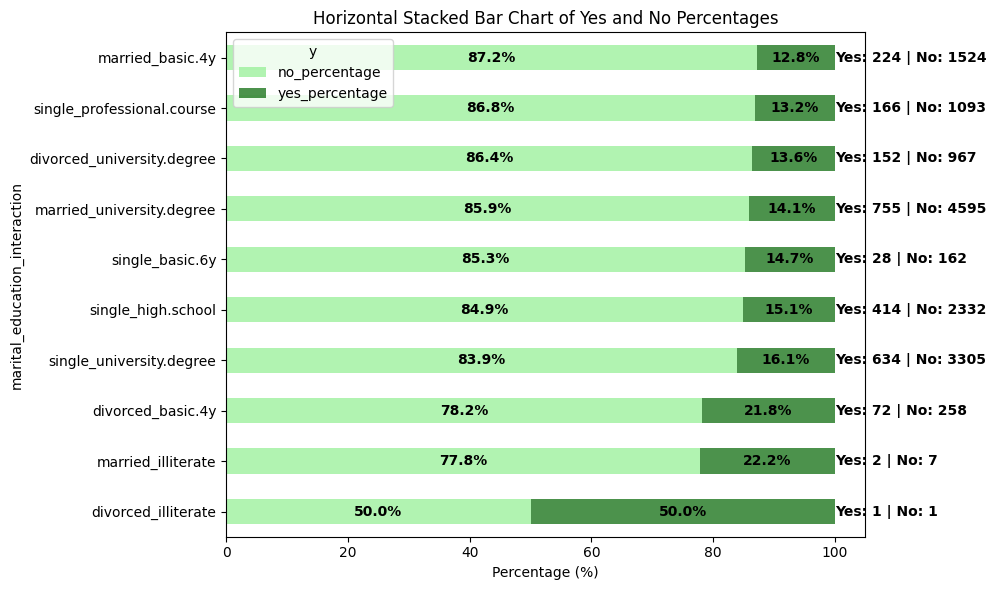

In [ ]:
# Calculating the pivot table with the 'y' column and counting 'no' and 'yes'
pivot_marital_education = df.pivot_table(
    index='marital_education_interaction',
    columns='y',  # Using the 'y' column to count 'no' and 'yes'
    aggfunc='size',  # Counting the occurrences of each combination
    fill_value=0
)

# Adding a 'Total' column for the count of each marital-education combination
pivot_marital_education['Total'] = pivot_marital_education['no'] + pivot_marital_education['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_marital_education['no_percentage'] = (pivot_marital_education['no'] / pivot_marital_education['Total']) * 100
pivot_marital_education['yes_percentage'] = (pivot_marital_education['yes'] / pivot_marital_education['Total']) * 100

# Sorting by the largest 'yes_percentage' and selecting the top 10
pivot_marital_education_sorted = pivot_marital_education.sort_values(by='yes_percentage', ascending=False).head(10)

# Creating a horizontally stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for percentages, horizontal with light green and dark green colors
bars = pivot_marital_education_sorted[['no_percentage', 'yes_percentage']].plot(kind='barh', stacked=True, ax=ax, color=['lightgreen', 'darkgreen'], alpha=0.7)
ax.set_xlabel('Percentage (%)')
ax.set_title('Horizontal Stacked Bar Chart of Yes and No Percentages')

# Adding percentages inside the bars with black text
for i, (no_pct, yes_pct) in enumerate(zip(pivot_marital_education_sorted['no_percentage'], pivot_marital_education_sorted['yes_percentage'])):
    ax.text(no_pct / 2, i, f'{no_pct:.1f}%', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax.text(no_pct + yes_pct / 2, i, f'{yes_pct:.1f}%', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Adding the count labels at the end of the bars
for i, (yes, no) in enumerate(zip(pivot_marital_education_sorted['yes'], pivot_marital_education_sorted['no'])):
    ax.text(100, i, f'Yes: {yes} | No: {no}', ha='left', va='center', color='black', fontsize=10, fontweight='bold')

# Adjusting the layout to avoid overlap
plt.tight_layout()

# Displaying the chart
plt.show()


**Explanation**

- **Single with higher education** has the highest proportion of `yes`, possibly because they are more open to new opportunities and have more resources to explore offers.

- **Married with higher education** also shows a high percentage of `yes`, likely because they seek long-term benefits and have a good understanding of relevant offers.

- **Categories with the lowest `yes` percentages**, such as **blue-collar** and **entrepreneur** with lower education, tend to be less responsive to offers. Possible reasons include:
  - **Financial Constraints**: They may have limited budgets, making them less interested in offers that require additional spending.
  - **Lack of Relevance**: The offers may not align with their needs or interests.
  - **Education Level**: Lower education might result in a limited understanding of the benefits of the offers, making them less appealing.
  - **Different Priorities**: They may have other more urgent or relevant priorities based on their situation.

## **2.8 How Do Occupation, Marital Status, and Education Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Calculating the count of each job-marital-education combination against the target variable
pivot_job_marital_education = pd.pivot_table(
    df,
    index='job_marital_education_interaction',
    columns='y',
    aggfunc='size',  # Counting the number of rows for each job-marital-education combination and y
    fill_value=0
)

# Adding a 'Total' column for the count of each job-marital-education combination
pivot_job_marital_education['Total'] = pivot_job_marital_education['no'] + pivot_job_marital_education['yes']

# Calculating the percentage of 'no' and 'yes' against the total
pivot_job_marital_education['no_percentage'] = (pivot_job_marital_education['no'] / pivot_job_marital_education['Total']) * 100
pivot_job_marital_education['yes_percentage'] = (pivot_job_marital_education['yes'] / pivot_job_marital_education['Total']) * 100

# Sorting by the largest 'yes_percentage'
pivot_job_marital_education_sorted = pivot_job_marital_education.sort_values(by='yes_percentage', ascending=False)

# Resetting the index to get the default index
pivot_job_marital_education_sorted_reset = pivot_job_marital_education_sorted.reset_index()

# Setting display options to show all rows
pd.set_option('display.max_rows', None)

# Displaying the table with the default index
display(pivot_job_marital_education_sorted_reset[['job_marital_education_interaction', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage']])


y,job_marital_education_interaction,no,yes,Total,no_percentage,yes_percentage
0,student_divorced_professional.course,0,1,1,0.000000,100.000000
1,student_single_basic.6y,5,7,12,41.666667,58.333333
2,retired_divorced_illiterate,1,1,2,50.000000,50.000000
3,entrepreneur_married_illiterate,1,1,2,50.000000,50.000000
4,student_divorced_university.degree,2,2,4,50.000000,50.000000
5,student_married_professional.course,2,2,4,50.000000,50.000000
6,entrepreneur_single_basic.6y,1,1,2,50.000000,50.000000
7,retired_divorced_basic.6y,4,3,7,57.142857,42.857143
8,student_single_professional.course,21,14,35,60.000000,40.000000
9,retired_divorced_basic.4y,73,46,119,61.344538,38.655462


In [ ]:
# Assuming df is the DataFrame with the existing columns
pivot_job_marital_education_sorted['score'] = pivot_job_marital_education_sorted['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted['Total'])

# Normalizing the score (optional, depending on analysis needs)
pivot_job_marital_education_sorted['normalized_score'] = (pivot_job_marital_education_sorted['score'] - pivot_job_marital_education_sorted['score'].min()) / (pivot_job_marital_education_sorted['score'].max() - pivot_job_marital_education_sorted['score'].min())

# Sorting by score and selecting the top 10
top_10 = pivot_job_marital_education_sorted.sort_values(by='normalized_score', ascending=False).head(20)

# Resetting the index so that 'job_marital_education_interaction' becomes a column
top_10 = top_10.reset_index()

# Displaying the required columns: job_marital_education_interaction, normalized_score, Total, no_percentage, yes_percentage
display(top_10[['job_marital_education_interaction', 'normalized_score', 'Total', 'no_percentage', 'yes_percentage']])

y,job_marital_education_interaction,normalized_score,Total,no_percentage,yes_percentage
0,retired_married_basic.4y,1.000000,301,61.794020,38.205980
1,student_single_high.school,0.922848,304,64.802632,35.197368
2,retired_divorced_basic.4y,0.848240,119,61.344538,38.655462
3,student_single_basic.9y,0.758521,83,62.650602,37.349398
4,retired_married_university.degree,0.717037,163,69.325153,30.674847
5,student_single_basic.6y,0.685797,12,41.666667,58.333333
6,student_single_professional.course,0.657007,35,60.000000,40.000000
7,retired_married_professional.course,0.656790,142,71.126761,28.873239
8,retired_married_high.school,0.653667,156,71.794872,28.205128
9,admin._single_university.degree,0.566862,2125,83.858824,16.141176


In [ ]:
# Assuming pivot_job_marital_education_sorted is a DataFrame with the existing columns
pivot_job_marital_education_sorted['score'] = pivot_job_marital_education_sorted['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted['Total'])

# Normalizing the score
pivot_job_marital_education_sorted['normalized_score'] = (pivot_job_marital_education_sorted['score'] - pivot_job_marital_education_sorted['score'].min()) / (pivot_job_marital_education_sorted['score'].max() - pivot_job_marital_education_sorted['score'].min())

# Sorting by normalized_score and selecting the top 10
top_10 = pivot_job_marital_education_sorted.sort_values(by='normalized_score', ascending=False).head(10)

# Resetting the index so that 'job_marital_education_interaction' becomes a column
top_10 = top_10.reset_index()

# Create figure
fig = go.Figure()

# Add trace for normalized_score with green color
fig.add_trace(go.Bar(
    y=top_10['job_marital_education_interaction'],  # X-axis becomes categories
    x=top_10['normalized_score'],  # Y-axis becomes the score
    name='Normalized Score',
    marker_color='green',  # Change color to green
    orientation='h'  # Horizontal bars
))

# Update layout
fig.update_layout(
    title='Top 10 Job, Marital, and Education Combinations by Normalized Score',
    xaxis_title='Normalized Score',
    yaxis_title='Job, Marital, and Education Combinations',
    xaxis=dict(
        title='Normalized Score',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Job, Marital, and Education Combinations',
        autorange='reversed'  # Reverse y-axis to have the highest scores at the top
    ),
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14)
)

fig.show()


From the visualization above, it can be observed that the `retired` and `student` categories often have a higher percentage of `yes` responses compared to other categories, regardless of their marital status and education. Several possible reasons for this phenomenon include:

1. **Demographic Profile**:
   - **Retired**: This category often consists of individuals who are retired and may have more leisure time. They tend to have a more stable financial situation and are not bound by work obligations, giving them more freedom to make different decisions regarding services or products offered.
   - **Student**: Students, especially those in higher education, are often more open to change and exploration. They may be more willing to try new products or services, or they might be interested in offers relevant to their study needs.

2. **Needs and Interests**:
   - **Retired**: They may be more focused on future planning or long-term benefits, making them more likely to choose `yes` if the product or service offers added value or sustainable benefits.
   - **Student**: As a group frequently seeking new opportunities and solutions that support their studies, they may be more inclined to choose `yes` if the offer is related to education, entertainment, or their daily needs.

3. **Influence of Marital Status and Education**:
   - Marital status and education can influence consumer decisions, but in the case of `retired` and `student`, these factors may have less impact on their choices compared to their demographic profile and personal needs.
   - For example, single students or retired individuals may feel freer in making decisions without having to consider the impact on family or professional responsibilities.

4. **Motivation and Personal Experience**:
   - **Retired**: Individuals in this category may be more inclined to seek products or services that provide comfort or enhance their quality of life.
   - **Student**: They may be influenced by factors such as special promotions or offers relevant to their campus life, making them more likely to choose `yes`.

In [ ]:
# Disable warnings
pd.set_option('mode.chained_assignment', None)

# Assuming df is the DataFrame with the existing columns
pivot_job_marital_education_sorted_reset['score'] = pivot_job_marital_education_sorted_reset['yes_percentage'] * np.log1p(pivot_job_marital_education_sorted_reset['Total'])

# Normalizing the score (optional, depending on analysis needs)
pivot_job_marital_education_sorted_reset['normalized_score'] = (pivot_job_marital_education_sorted_reset['score'] - pivot_job_marital_education_sorted_reset['score'].min()) / (pivot_job_marital_education_sorted_reset['score'].max() - pivot_job_marital_education_sorted_reset['score'].min())

# Sorting by score
pivot_job_marital_education_sorted_reset = pivot_job_marital_education_sorted_reset.sort_values(by='normalized_score', ascending=False)

# Filter rows containing the word 'management'
management_data_sorted = pivot_job_marital_education_sorted_reset[
    pivot_job_marital_education_sorted_reset['job_marital_education_interaction'].str.contains('management', case=False, na=False)
].copy()  # Using .copy() to avoid chained assignment warning

# Recalculate score after filtering
management_data_sorted['score'] = management_data_sorted['yes_percentage'] * np.log1p(management_data_sorted['Total'])

# Normalize the score (optional)
management_data_sorted['normalized_score'] = (management_data_sorted['score'] - management_data_sorted['score'].min()) / (management_data_sorted['score'].max() - management_data_sorted['score'].min())

# Sorting by score after filtering
management_data_sorted = management_data_sorted.sort_values(by='normalized_score', ascending=False)

# Display the required columns: job_marital_education_interaction, normalized_score, Total, no_percentage, yes_percentage
display(management_data_sorted[['job_marital_education_interaction', 'normalized_score', 'Total', 'no_percentage', 'yes_percentage']])


y,job_marital_education_interaction,normalized_score,Total,no_percentage,yes_percentage
81,management_married_university.degree,1.000000,1229,87.225386,12.774614
64,management_single_university.degree,0.971855,352,84.943182,15.056818
38,management_married_basic.6y,0.892078,48,79.166667,20.833333
62,management_divorced_university.degree,0.889980,204,84.803922,15.196078
46,management_single_professional.course,0.497094,11,81.818182,18.181818
121,management_married_high.school,0.486234,147,91.156463,8.843537
123,management_married_professional.course,0.368359,46,91.304348,8.695652
136,management_married_basic.9y,0.358261,99,92.929293,7.070707
141,management_divorced_high.school,0.251883,30,93.333333,6.666667
147,management_single_basic.9y,0.246011,31,93.548387,6.451613


From the analysis conducted, it can be concluded that the percentage of customers choosing "yes" tends to be higher in the **student** and **retired** categories, especially with higher education levels. This indicates that customers in these categories are more likely to choose "yes" compared to others, although the total number of customers may not always be large.

**However, if the bank considers large balances as a primary factor, focusing on job categories with higher education levels, particularly ***management***, can be an effective strategy.**

1. **Focus on Management Jobs:**
   - **Managers with Higher Education:** The **management** job category with higher education (such as a university degree or professional course) shows a relatively high "yes" percentage. This indicates that, although the total number of customers may be lower, the quality and financial potential of this category are higher.
   - **Large Balances:** Managerial positions are typically associated with higher income and larger balances. Therefore, the bank can prioritize customers in this category for product and service offerings with higher revenue potential.

2. **Marketing and Offering Strategies:**
   - **Strategic Targeting:** The bank can direct its marketing efforts and special product offerings to customers in the managerial job category with higher education, especially those with a high "yes" percentage.
   - **Product Customization:** Tailoring products and services to meet the needs and preferences of customers in this category can enhance customer satisfaction and the bank’s revenue potential.

## **2.9 How Do Default, Housing, and Loan Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Function to count based on a specific column and deposit status
def count_by_category(df, category_column, yes_label, no_label):
    # Count based on values in the category and deposit status
    counts = df.groupby([category_column, 'y']).size().unstack(fill_value=0)

    # Calculate total and percentage
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Replace labels for the final result
    counts.index = counts.index.map({
        'yes': yes_label,
        'no': no_label
    })

    return counts.reset_index()

# Adjust labels for each category
default_counts = count_by_category(df, 'default', 'Defaulted', 'Not Defaulted')
housing_counts = count_by_category(df, 'housing', 'Has Housing Loan', 'No Housing Loan')
loan_counts = count_by_category(df, 'loan', 'Has Personal Loan', 'No Personal Loan')

# Display the results
print("Number of customers by default status and deposit status:")
display(default_counts)

print("\nNumber of customers by housing status and deposit status:")
display(housing_counts)

print("\nNumber of customers by loan status and deposit status:")
display(loan_counts)


Number of customers by default status and deposit status:


y,default,no,yes,Total,no_percentage,yes_percentage
0,Not Defaulted,26617,3858,30475,87.340443,12.659557
1,Defaulted,3,0,3,100.000000,0.000000



Number of customers by housing status and deposit status:


y,housing,no,yes,Total,no_percentage,yes_percentage
0,No Housing Loan,12246,1716,13962,87.709497,12.290503
1,Has Housing Loan,14374,2142,16516,87.030758,12.969242



Number of customers by loan status and deposit status:


y,loan,no,yes,Total,no_percentage,yes_percentage
0,No Personal Loan,22437,3273,25710,87.269545,12.730455
1,Has Personal Loan,4183,585,4768,87.730705,12.269295


**Explanation**

- **Defaulted**: There are very few customers in this category, and none have deposits. This may indicate that customers who have defaulted are either inactive or very few in number. It may be advisable not to offer deposit products to customers with a default status, as they may face financial issues that hinder their ability to commit to deposits. Additionally, offering deposit products to customers with a default status could result in a low success rate for these products, given the indication of financial instability.

- **Housing**: Customers with housing loans are slightly more likely to have deposits compared to those without housing loans, but the difference is minimal. This suggests that customers with housing loans may have slightly better financial stability, but the difference is not substantial enough to significantly affect marketing strategies.

- **Loan**: The percentage of deposits does not differ significantly between customers with loans and those without loans. Although there is a slight difference, both groups have nearly the same percentage of deposits. This indicates that loan status may not significantly influence the decision to have a deposit, so marketing strategies for deposit products can be applied uniformly without deeply considering loan status.

## **2.10 How Does Contact Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Function to calculate count and percentage based on the contact column
def count_contact(df):
    # Calculate count based on contact and deposit status
    counts = df.groupby(['contact', 'y']).size().unstack(fill_value=0)

    # Calculate total and percentage
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    return counts.reset_index()

# Calculate count and percentage for contact
contact_counts = count_contact(df)

# Display the results
print("Count and Percentage by Contact and Deposit Status:")
display(contact_counts)


Count and Percentage by Contact and Deposit Status:


y,contact,no,yes,Total,no_percentage,yes_percentage
0,cellular,17163,3272,20435,83.988255,16.011745
1,telephone,9457,586,10043,94.165090,5.834910


In [ ]:
# Function to prepare data for visualization
def prepare_data_for_plot(data):
    # Create a new DataFrame in the format suitable for Plotly
    df_plot = data.melt(id_vars='contact', value_vars=['yes_percentage', 'no_percentage'],
                        var_name='response', value_name='percentage')
    # Keep Yes and No consistent with the original data
    df_plot['response'] = df_plot['response'].map({
        'yes_percentage': 'Yes',  # Yes remains Yes
        'no_percentage': 'No'     # No remains No
    })
    return df_plot

# Prepare the data
plot_data = prepare_data_for_plot(contact_counts)

# Create the visualization with Plotly
fig = px.bar(plot_data, x='contact', y='percentage', color='response',
             color_discrete_map={'Yes': '#2E8B57',  # Dark green (SeaGreen) for Yes
                                 'No': '#87CEEB'},  # Light blue (SkyBlue) for No
             title='Deposit Distribution for Each Contact Type',
             labels={'contact': 'Contact Type', 'percentage': 'Percentage (%)', 'response': 'Response'})

# Add percentage labels above the bars with 'percent' and bold text
for index, row in plot_data.iterrows():
    fig.add_annotation(
        x=row['contact'],
        y=row['percentage'],
        text=f"<b>{row['percentage']:.1f}%</b>",  # Bold the text
        showarrow=False,
        font=dict(size=14, color='black'),  # Increase font size and bold text
        yshift=8  # Adjust the label position above the bars
    )

# Display the chart
fig.update_layout(
    font=dict(
        family="Arial",
        size=14,  # Increase text size in the chart
        color="black"
    ),
    legend_title_text='Response'  # Appropriate legend title
)

fig.show()


**Explanation**

- **Cellular** appears to be more effective in gaining customer approval compared to **Telephone**. This may be due to the convenience and flexibility offered by mobile communication. Since cell phones can be accessed anytime and anywhere, customers are more easily reached and more likely to respond to offers.

- **These results suggest** that the **Cellular** communication method may be more successful in persuading customers to make deposits compared to the **Telephone** method. Possible reasons include higher convenience and ease of access with mobile phones, allowing smoother interactions and faster responses.

- **The lower percentage for Telephone** may indicate that customers are more easily influenced through **Cellular** contact. Some possible reasons are:
  - **Convenience and Flexibility**: Mobile phones can be used anywhere, making them more accessible to customers whenever they have time to respond.
  - **Frequency and Reach**: Mobile phones can be used more frequently and widely, providing more opportunities to interact with customers.
  - **User Experience**: Interaction through mobile phones may feel more personal and less intrusive compared to landlines, increasing the likelihood of customer approval.
  - **Limitations of Landlines**: Landlines may be less practical, especially if customers are not always at home or if they rarely use their landline phones.

## **2.11 How Does Month Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Function to calculate count and percentage by month
def count_by_month(df):
    # Calculate count based on month and deposit status
    counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)

    # Calculate total and percentage
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    return counts.reset_index()

# Calculate count and percentage for each month
month_counts = count_by_month(df)

# Display the results
print("Count and Percentage by Month and Deposit Status:")
display(month_counts)


Count and Percentage by Month and Deposit Status:


y,month,no,yes,Total,no_percentage,yes_percentage
0,apr,1646,468,2114,77.861873,22.138127
1,aug,4139,533,4672,88.591610,11.408390
2,dec,83,74,157,52.866242,47.133758
3,jul,4566,511,5077,89.935001,10.064999
4,jun,3162,452,3614,87.493082,12.506918
5,mar,236,246,482,48.962656,51.037344
6,may,9031,700,9731,92.806495,7.193505
7,nov,3130,365,3495,89.556509,10.443491
8,oct,354,287,641,55.226209,44.773791
9,sep,273,222,495,55.151515,44.848485


In [ ]:
# Function to calculate count, percentage, and score by month
def count_by_month(df):
    # Calculate count based on month and deposit status
    counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)

    # Calculate total and percentage
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Calculate score as the product of yes_percentage and log1p(Total)
    counts['score'] = counts['yes_percentage'] * np.log1p(counts['Total'])

    # Normalize score
    counts['normalized_score'] = (counts['score'] - counts['score'].min()) / (counts['score'].max() - counts['score'].min())

    # Sort by the highest score
    counts = counts.sort_values(by='score', ascending=False)

    return counts.reset_index()

# Calculate count, percentage, and score for each month
month_counts = count_by_month(df)

# Display the results
print("Count, Percentage, and Score by Month and Deposit Status:")
display(month_counts[['month', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage', 'score', 'normalized_score']])


Count, Percentage, and Score by Month and Deposit Status:


y,month,no,yes,Total,no_percentage,yes_percentage,score,normalized_score
0,mar,236,246,482,48.962656,51.037344,315.411638,1.000000
1,oct,354,287,641,55.226209,44.773791,289.444125,0.895860
2,sep,273,222,495,55.151515,44.848485,278.355526,0.851391
3,dec,83,74,157,52.866242,47.133758,238.619129,0.692032
4,apr,1646,468,2114,77.861873,22.138127,169.507432,0.414868
5,jun,3162,452,3614,87.493082,12.506918,102.467264,0.146010
6,aug,4139,533,4672,88.591610,11.408390,96.395840,0.121662
7,jul,4566,511,5077,89.935001,10.064999,85.881343,0.079494
8,nov,3130,365,3495,89.556509,10.443491,85.212354,0.076812
9,may,9031,700,9731,92.806495,7.193505,66.059216,0.000000


In [ ]:
# Sorting from highest to lowest based on score
month_counts_sorted = month_counts.sort_values(by='score', ascending=True)

# Creating a horizontal bar chart using Plotly
fig = px.bar(
    month_counts_sorted,
    x='score',  # Using 'score' as the x-axis
    y='month',  # Using 'month' as the y-axis
    orientation='h',  # Creating a horizontal bar chart
    text='yes_percentage',  # Displaying 'yes' percentage on the chart
    title='Total Score by Month',
    labels={'score': 'Score', 'month': 'Month'}
)

# Adding percentage annotations
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')

# Displaying the chart
fig.show()


**Explanation**

Overall, March is the best month in terms of strategy effectiveness, while May is the weakest. Other months show variation in effectiveness, with some months potentially requiring more attention to improve results. These performance differences may be influenced by socio-economic factors affecting customer responses. Further analysis on economic factors will be conducted in the next stage of the analysis.

## **2.12 Does the Day of the Week Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Function to calculate count, percentage, and score by day of the week
def count_by_day_of_week(df):
    # Calculate count based on day of the week and deposit status
    counts = df.groupby(['day_of_week', 'y']).size().unstack(fill_value=0)

    # Calculate total and percentage
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100

    # Calculate score as the product of yes_percentage and log1p(Total)
    counts['score'] = counts['yes_percentage'] * np.log1p(counts['Total'])

    # Normalize score
    counts['normalized_score'] = (counts['score'] - counts['score'].min()) / (counts['score'].max() - counts['score'].min())

    # Sort by the highest score
    counts = counts.sort_values(by='score', ascending=False)

    return counts.reset_index()

# Calculate count, percentage, and score for each day of the week
day_of_week_counts = count_by_day_of_week(df)

# Display the results
print("Count, Percentage, and Score by Day of the Week and Deposit Status:")
display(day_of_week_counts[['day_of_week', 'no', 'yes', 'Total', 'no_percentage', 'yes_percentage', 'score', 'normalized_score']])


Count, Percentage, and Score by Day of the Week and Deposit Status:


y,day_of_week,no,yes,Total,no_percentage,yes_percentage,score,normalized_score
0,thu,5513,878,6391,86.261931,13.738069,120.383987,1.000000
1,tue,5162,789,5951,86.741724,13.258276,115.234074,0.766353
2,wed,5316,809,6125,86.791837,13.208163,115.179110,0.763859
3,fri,5057,676,5733,88.208617,11.791383,102.044619,0.167959
4,mon,5572,706,6278,88.754380,11.245620,98.342561,0.000000


In [ ]:
# Sort data by score from highest to lowest
day_of_week_counts_sorted = day_of_week_counts.sort_values(by='score', ascending=True)

# Define a custom green color scheme (from light green to dark green)
custom_green_scale = [
    (0.0, "rgb(144,238,144)"),  # Light green (for low scores)
    (0.5, "rgb(34,139,34)"),    # Medium green
    (1.0, "rgb(0,100,0)")       # Very dark green (for high scores)
]

# Create a horizontal bar chart with a custom green color scale
fig = px.bar(day_of_week_counts_sorted,
             y='day_of_week',
             x='score',
             text='score',
             color='score',  # Using 'score' for color
             color_continuous_scale=custom_green_scale,  # Custom green color scheme
             title='Score by Day of the Week',
             labels={'day_of_week': 'Day of the Week', 'score': 'Score'},
             orientation='h')

# Display values on the bars
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  textfont=dict(color='black'))  # Ensure text is always visible with black color

# Adjust layout
fig.update_layout(
    xaxis_title='Score',
    yaxis_title='Day of the Week',
    xaxis=dict(title='Score', range=[0, day_of_week_counts_sorted['score'].max() * 1.1]),
    yaxis=dict(title='Day of the Week'),
    coloraxis_colorbar=dict(
        title='Score',
        tickvals=[day_of_week_counts_sorted['score'].min(), day_of_week_counts_sorted['score'].max()],
        ticktext=[f'{day_of_week_counts_sorted["score"].min():.2f}', f'{day_of_week_counts_sorted["score"].max():.2f}']
    )
)

# Display the chart
fig.show()


**Explanation**

1. **Thursday (Thu)** shows a significantly higher deposit percentage compared to other days. This indicates that more people make deposits on Thursdays than on other days of the week. This could be due to several factors, such as consumer habits that tend to be more active on that day.

2. **Monday (Mon)** has the lowest deposit percentage. This could be because the beginning of the week is typically a busy time for many people. Consumers may also start the week with more careful financial planning, leading to lower deposits on this day.

3. **Tuesday (Tue)** and **Wednesday (Wed)** also show high deposit rates, nearly equal to Thursday. This may indicate that consumers feel comfortable making deposits mid-week, possibly because their early-week expenses are clearer, and they feel more financially stable.

4. **Friday (Fri)** has a slightly lower score compared to Thursday, Tuesday, and Wednesday. This might be because consumers are more focused on weekend preparations and may be more likely to postpone spending or deposit decisions until the following week.

## **2.13 Does Contact Duration Influence Customers' Tendency to Make Deposits?**

In [ ]:
# Define binning limits in seconds
bins = [0, 300, 600, 1200, 2400, 5000]  # Bin limits based on duration range
# Add labels with estimated minutes
labels = [
    'Very Short (0-5 min)',  # 0 to less than 5 minutes
    'Short (5-10 min)',      # 5 to less than 10 minutes
    'Medium (10-20 min)',    # 10 to less than 20 minutes
    'Long (20-40 min)',      # 20 to less than 40 minutes
    'Very Long (40-83 min)'  # 40 to less than 83 minutes
]

# Add a new 'duration_binned' column to the DataFrame with updated labels
df['duration_binned'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)

# Display unique values in the 'duration_binned' column
unique_duration_binned = df['duration_binned'].unique()

# Count and calculate percentage based on duration categories and deposit status
def count_by_duration_binned(df):
    counts = df.groupby(['duration_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Calculate count and percentage for each duration category
duration_binned_counts = count_by_duration_binned(df)

# Display the results with display
print("Count and Percentage by Duration Category and Deposit Status:")
display(duration_binned_counts)


Count and Percentage by Duration Category and Deposit Status:


y,duration_binned,no,yes,Total,no_percentage,yes_percentage
0,Very Short (0-5 min),20789,1336,22125,93.961582,6.038418
1,Short (5-10 min),4532,1225,5757,78.721556,21.278444
2,Medium (10-20 min),1151,1060,2211,52.057892,47.942108
3,Long (20-40 min),137,221,358,38.268156,61.731844
4,Very Long (40-83 min),11,16,27,40.740741,59.259259


**Explanation**

From the table, we observe that the longer the call duration, the higher the likelihood of the customer making a deposit. However, it is important to remember that the `duration` column may have some ambiguity in its interpretation.

**Ambiguity Analysis:**

- **Long Duration vs. Interest**: A longer duration may not be the cause of the customer making a deposit but rather a result of pre-existing interest. Customers who are interested may continue the conversation longer, meaning that this duration does not fully reflect the effectiveness of the call but instead the growing interest of the customer during the conversation.

- **Potential Bias**: Since `duration` is measured after the conversation has ended, this could create bias. A long duration may result from an in-depth discussion because the customer was already interested, not because the long duration itself made them interested. Therefore, call duration cannot be a strong standalone indicator without considering the context of the conversation.

In [ ]:
# Calculate count based on duration category and poutcome
def count_by_duration_and_poutcome(df):
    poutcome_counts = df.groupby(['duration_binned', 'poutcome'], observed=False).size().unstack(fill_value=0)
    return poutcome_counts.reset_index()

# Calculate count and percentage for each duration category and poutcome
poutcome_counts = count_by_duration_and_poutcome(df)

# Display the results with display
print("Count and Percentage by Duration Category and Poutcome:")
display(poutcome_counts)

Count and Percentage by Duration Category and Poutcome:


poutcome,duration_binned,failure,nonexistent,success
0,Very Short (0-5 min),2553,18845,727
1,Short (5-10 min),663,4755,339
2,Medium (10-20 min),204,1891,116
3,Long (20-40 min),41,309,8
4,Very Long (40-83 min),0,26,1


**Explanation**

When examining the relationship between duration and the `poutcome` column, it is evident that many customers had never been contacted before (nonexistent), making it difficult to determine their level of interest based solely on the length of the conversation. The fact that customers who had not been contacted before can also have longer conversation durations indicates that duration alone may not be sufficient to predict outcomes, especially when there has been no prior contact. This complexity adds ambiguity to using duration as a predictive feature.

## **2.14 Analysis of Number of Contacts, Days Since Last Contact, and Previous Contacts on Deposit Status**

### **2.14.1 Number of Contacts in the Current Campaign**

In [ ]:
# Define binning limits
bins = [0, 2, 4, 6, max(df['campaign'])+1]
labels = ['Low (1-2)', 'Medium (3-4)', 'High (5-6)', 'Very High (7+)']

# Add a new 'campaign_binned' column
df['campaign_binned'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

# Calculate count and percentage based on 'campaign_binned' categories and deposit status 'y'
def count_by_campaign_binned(df):
    counts = df.groupby(['campaign_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Calculate count and percentage for each category
campaign_binned_counts = count_by_campaign_binned(df)

# Display the results with display
print("Count and Percentage by Campaign Category and Deposit Status:")
display(campaign_binned_counts)


Count and Percentage by Campaign Category and Deposit Status:


y,campaign_binned,no,yes,Total,no_percentage,yes_percentage
0,Low (1-2),11321,1919,13240,85.506042,14.493958
1,Medium (3-4),10278,1497,11775,87.286624,12.713376
2,High (5-6),2791,301,3092,90.265201,9.734799
3,Very High (7+),2230,141,2371,94.053142,5.946858


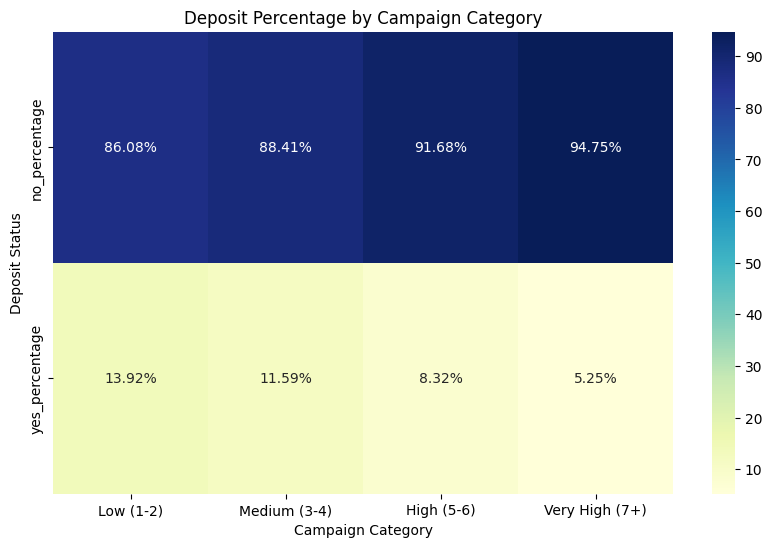

In [ ]:
# Define binning limits for the campaign
bins_campaign = [0, 2, 4, 6, float('inf')]
labels_campaign = ['Low (1-2)', 'Medium (3-4)', 'High (5-6)', 'Very High (7+)']

# Add the 'campaign_binned' column
df['campaign_binned'] = pd.cut(df['campaign'], bins=bins_campaign, labels=labels_campaign)

# Calculate count and percentage based on campaign category and deposit status
campaign_counts = df.groupby(['campaign_binned', 'y']).size().unstack(fill_value=0)
campaign_counts['Total'] = campaign_counts.sum(axis=1)
campaign_counts['no_percentage'] = (campaign_counts['no'] / campaign_counts['Total']) * 100
campaign_counts['yes_percentage'] = (campaign_counts['yes'] / campaign_counts['Total']) * 100

# Create a matrix for percentage annotations with % symbol
annotations = campaign_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create a heatmap for campaign
plt.figure(figsize=(10, 6))
sns.heatmap(campaign_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, fmt="", cmap="YlGnBu")
plt.title('Deposit Percentage by Campaign Category')
plt.xlabel('Campaign Category')
plt.ylabel('Deposit Status')
plt.show()

**Explanation**

The analysis of the number of contacts (*campaign*) conducted shows that there is a tendency for more contacts to influence the likelihood of deposits. However, this pattern has important limitations that need to be understood:

1. **Increase in Contacts Up to a Certain Point:**
   - While there is initially an increase in the likelihood of deposits with a higher number of contacts, after around 5 contacts, the data shows that additional contacts no longer have a significant positive effect on the probability of a deposit.

2. **Impact of Excessive Contacts:**
   - When the number of contacts exceeds a certain limit (around 7 or more), the effectiveness of communication begins to decline. In the *Very High* category (7+ contacts), the proportion of customers making deposits drops significantly. This may indicate that a very high number of contacts could be perceived as intrusive by customers.

3. **Disruption and Negative Perception:**
   - Too many contacts can cause disruption and discomfort for customers. Customers who feel they are being contacted too frequently may feel pressured or annoyed, which can negatively impact their perception of the offer and the company's brand. In extreme cases, this could lead to dissatisfaction, reducing their likelihood of making a deposit.

4. **Quality vs. Quantity of Contacts:**
   - The quality of contact is also very important. A high number of contacts does not necessarily mean that each contact is conducted effectively or relevantly. If interactions are not tailored to the customer’s needs or interests, increasing the number of contacts will not improve results and may even be detrimental.

### **2.14.2 Days Since Last Contact**

In [ ]:
# Define binning limits for pdays
bins = [-1, 7, 30, 998, 1000]  # -1 to 7 for recently contacted, more than 30 for long-ago contacts, 999 for never contacted
labels = ['Recently Contacted (0-7 days)', 'Moderately Contacted (8-30 days)', 'Long Ago Contacted (>30 days)', 'Never Contacted']

# Add a new 'pdays_binned' column
df['pdays_binned'] = pd.cut(df['pdays'], bins=bins, labels=labels, right=False)

# Calculate count and percentage based on 'pdays_binned' categories and deposit status 'y'
def count_by_pdays_binned(df):
    counts = df.groupby(['pdays_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Calculate count and percentage for each pdays category
pdays_binned_counts = count_by_pdays_binned(df)

# Display the results with display
print("Count and Percentage by Pdays Category and Deposit Status:")
display(pdays_binned_counts)


Count and Percentage by Pdays Category and Deposit Status:


y,pdays_binned,no,yes,Total,no_percentage,yes_percentage
0,Recently Contacted (0-7 days),335,642,977,34.288639,65.711361
1,Moderately Contacted (8-30 days),136,197,333,40.840841,59.159159
2,Long Ago Contacted (>30 days),0,0,0,NaN,NaN
3,Never Contacted,26149,3019,29168,89.649616,10.350384


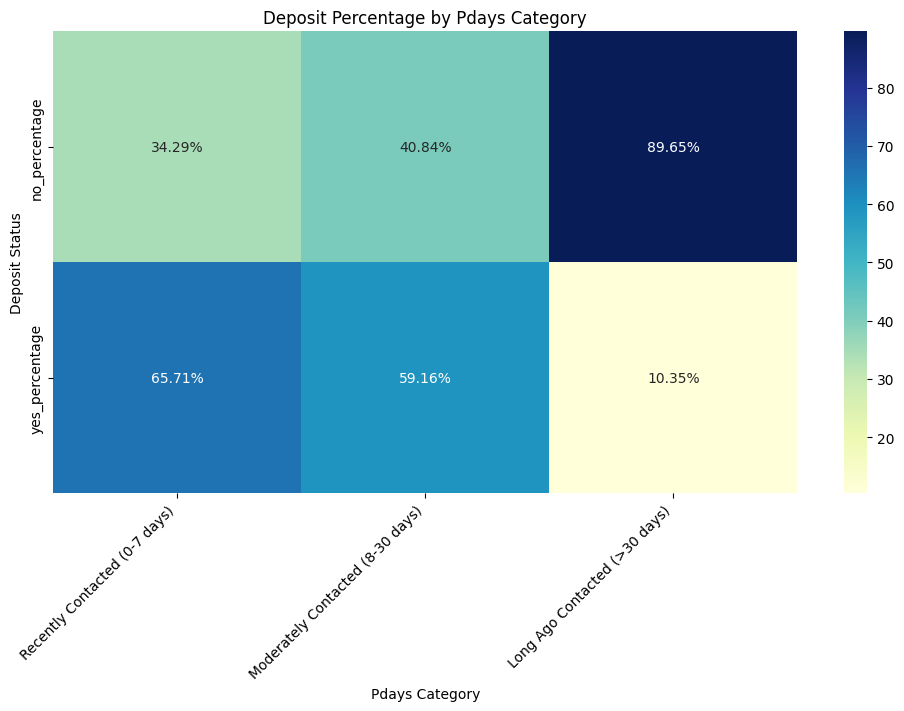

In [ ]:
# Define binning limits for pdays
bins_pdays = [0, 7, 30, float('inf')]
labels_pdays = ['Recently Contacted (0-7 days)', 'Moderately Contacted (8-30 days)', 'Long Ago Contacted (>30 days)']

# Add the 'pdays_binned' column
df['pdays_binned'] = pd.cut(df['pdays'], bins=bins_pdays, labels=labels_pdays, right=False)

# Calculate count and percentage based on pdays category and deposit status
pdays_counts = df.groupby(['pdays_binned', 'y']).size().unstack(fill_value=0)
pdays_counts['Total'] = pdays_counts.sum(axis=1)
pdays_counts['no_percentage'] = (pdays_counts['no'] / pdays_counts['Total']) * 100
pdays_counts['yes_percentage'] = (pdays_counts['yes'] / pdays_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = pdays_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for pdays with annotations including %
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pdays_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")

# Adjust x-axis labels
plt.title('Deposit Percentage by Pdays Category')
plt.xlabel('Pdays Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()


**Explanation**

- **Recent Contact is More Effective:** Contacts made recently (0-7 days) are the most effective in generating deposits, indicating that fresh outreach has a stronger impact on customer decisions.
  
- **Effectiveness Decreases Over Time:** The longer the time since the last contact, the lower the likelihood of a deposit, with long-ago contacts (>30 days) appearing to yield no measurable results.

- **Initial Contact is Critical:** Having no prior contact greatly reduces the chance of a deposit, emphasizing the importance of establishing initial communication with customers.

### **2.14.3 Number of Contacts in the Previous Campaign**

In [ ]:
# Define binning limits for 'previous' including the value 0
bins = [-1, 0, 2, 4, float('inf')]  # -1 to 0 for no previous contact, 1-2 for few contacts, etc.
labels = ['No Previous Contact', 'Few Previous Contacts (1-2)', 'Moderate Previous Contacts (3-4)', 'Many Previous Contacts (≥5)']

# Add a new 'previous_binned' column to the DataFrame with updated labels
df['previous_binned'] = pd.cut(df['previous'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate count and percentage based on 'previous_binned' categories and deposit status 'y'
def count_by_previous_binned(df):
    counts = df.groupby(['previous_binned', 'y'], observed=False).size().unstack(fill_value=0)
    counts['Total'] = counts['no'] + counts['yes']
    counts['no_percentage'] = (counts['no'] / counts['Total']) * 100
    counts['yes_percentage'] = (counts['yes'] / counts['Total']) * 100
    return counts.reset_index()

# Calculate count and percentage for each 'previous' category
previous_binned_counts = count_by_previous_binned(df)

# Display the results with display
print("Count and Percentage by Previous Contact Category and Deposit Status:")
display(previous_binned_counts)


Count and Percentage by Previous Contact Category and Deposit Status:


y,previous_binned,no,yes,Total,no_percentage,yes_percentage
0,No Previous Contact,23255,2571,25826,90.044916,9.955084
1,Few Previous Contacts (1-2),3256,1129,4385,74.253136,25.746864
2,Moderate Previous Contacts (3-4),101,145,246,41.056911,58.943089
3,Many Previous Contacts (≥5),8,13,21,38.095238,61.904762


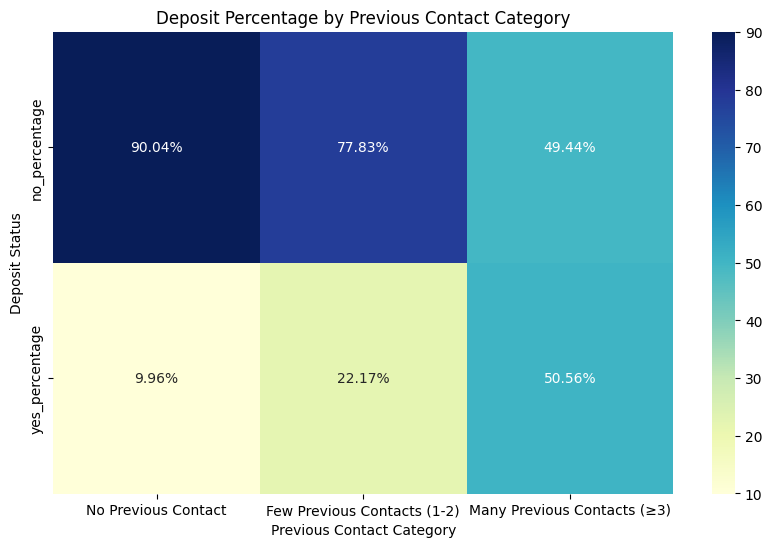

In [ ]:
# Define binning limits for 'previous'
bins_previous = [0, 1, 2, float('inf')]  # Add limits based on the data
# Removed one label to match the number of bins - 1
labels_previous = ['No Previous Contact', 'Few Previous Contacts (1-2)', 'Many Previous Contacts (≥3)']

# Add the 'previous_binned' column
df['previous_binned'] = pd.cut(df['previous'], bins=bins_previous, labels=labels_previous, right=False)

# Calculate count and percentage based on previous contact categories and deposit status
previous_counts = df.groupby(['previous_binned', 'y']).size().unstack(fill_value=0)
previous_counts['Total'] = previous_counts.sum(axis=1)
previous_counts['no_percentage'] = (previous_counts['no'] / previous_counts['Total']) * 100
previous_counts['yes_percentage'] = (previous_counts['yes'] / previous_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = previous_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for previous with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(previous_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Previous Contact Category')
plt.xlabel('Previous Contact Category')
plt.ylabel('Deposit Status')
plt.show()


**Explanation**

- **Initial Contact is Low in Effectiveness:** Not having previous contact is very ineffective in generating deposits. Establishing initial communication is a crucial step to improve conversion opportunities.

- **Few to Moderate Contacts Improve Chances:** A few (1-2) to moderate (3-4) contacts show an increase in the likelihood of deposits, with the proportion of deposits rising as the number of contacts increases.

- **Many Contacts are Still Effective:** Although a high number of contacts (≥5) remains effective in driving deposits, this should be managed carefully to avoid the risk of disturbing customers.

## **2. 15 Quarterly Analysis on Deposit Status**

In [ ]:
# Example code to create a pivot table
contact_quarter_counts = df.groupby(['contact_quarter', 'y']).size().unstack(fill_value=0)
contact_quarter_counts['Total'] = contact_quarter_counts.sum(axis=1)
contact_quarter_counts['no_percentage'] = (contact_quarter_counts['no'] / contact_quarter_counts['Total']) * 100
contact_quarter_counts['yes_percentage'] = (contact_quarter_counts['yes'] / contact_quarter_counts['Total']) * 100

# Display the results
print("Count and Percentage by Contact Quarter Category and Deposit Status:")
display(contact_quarter_counts)


Count and Percentage by Contact Quarter Category and Deposit Status:


y,no,yes,Total,no_percentage,yes_percentage
contact_quarter,,,,,
1,236,246,482,48.962656,51.037344
2,13839,1620,15459,89.520668,10.479332
3,8978,1266,10244,87.641546,12.358454
4,3567,726,4293,83.088749,16.911251


**Explanation**

- **Contact Effectiveness:** Quarter 1 and Quarter 4 show better results in terms of deposit conversion compared to Quarter 2 and Quarter 3. Quarter 4, in particular, has a relatively high deposit percentage with a more moderate number of contacts.

- **Strategy Improvement:** Quarter 2 and Quarter 3 indicate that the number of contacts does not always correlate with a higher deposit conversion rate. This could suggest issues with the strategy or the quality of prospects during these quarters.

- **Recommendation:** Focus efforts on the successful approaches seen in Quarter 1 and Quarter 4, and evaluate and improve strategies for Quarter 2 and Quarter 3. Consider adjusting contact strategies based on the timing and proven effectiveness.

There may be a connection with economic factors influencing the results in each quarter, which will be analyzed further in the next stage.

## **2.16 Analysis of Economic Factors on Deposit Decision**

### **2.16.1 Analysis of the Influence of Employment Variation Rate on Deposit Decision**

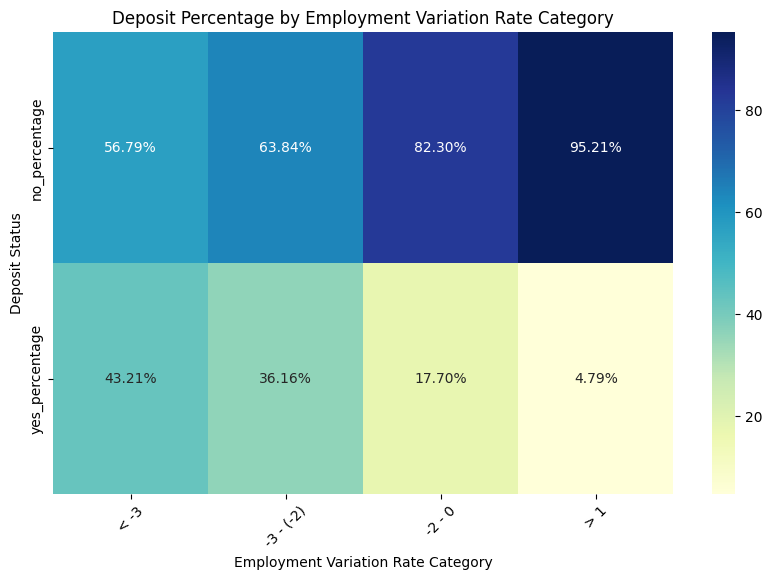

In [ ]:
# Define bins for emp.var.rate_bin in the correct order
bins_emp_var_rate = ['> 1', '-2 - 0', '-3 - (-2)', '< -3']

# Sort bins in logical order
bins_emp_var_rate_sorted = sorted(bins_emp_var_rate, key=lambda x: (
    -3 if x == '< -3' else
    (-2 if x == '-3 - (-2)' else
    (0 if x == '-2 - 0' else
    float('inf')))))

# Sort data based on the predefined bins
df['emp.var.rate_bin'] = pd.Categorical(df['emp.var.rate_bin'], categories=bins_emp_var_rate_sorted, ordered=True)

# Calculate count and percentage based on emp.var.rate_bin category and deposit status
emp_var_rate_counts = df.groupby(['emp.var.rate_bin', 'y']).size().unstack(fill_value=0)
emp_var_rate_counts['Total'] = emp_var_rate_counts.sum(axis=1)
emp_var_rate_counts['no_percentage'] = (emp_var_rate_counts['no'] / emp_var_rate_counts['Total']) * 100
emp_var_rate_counts['yes_percentage'] = (emp_var_rate_counts['yes'] / emp_var_rate_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = emp_var_rate_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for emp.var.rate_bin with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(emp_var_rate_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Employment Variation Rate Category')
plt.xlabel('Employment Variation Rate Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45)  # To avoid overlapping x-axis labels
plt.show()


**Explanation**

**Warning:** The data shows that the lower the employment variation rate category, the higher the percentage of "yes" deposits. Let’s further analyze the cause, because while negative values indicate economic instability, the more negative the value, the higher the percentage of "yes" deposits.

**Analysis Based on Employment Variation Rate Category and Deposit Status**

- **Positive Employment Fluctuation Rate (Category > 1):**
  * When the employment fluctuation rate is positive, the proportion of people making deposits is very low (only 4.79%). This might suggest that during slightly improving economic conditions, people may be more inclined to invest their money or seek other opportunities rather than saving, as they feel more confident in economic stability.

- **Negative Employment Fluctuation Rate (Category < -3 to -2 - 0):**
  * Conversely, when the employment fluctuation rate is negative, the proportion of "yes" deposits increases. In the < -3 category, the deposit percentage is 43.21%, and in the -3 - (-2) category, the deposit percentage is 36.16%. This may be due to high economic uncertainty and concerns about financial stability, which drives people to save as a form of protection.

### **2.16.2 Effect of the Consumer Price Index on Deposit Likelihood**

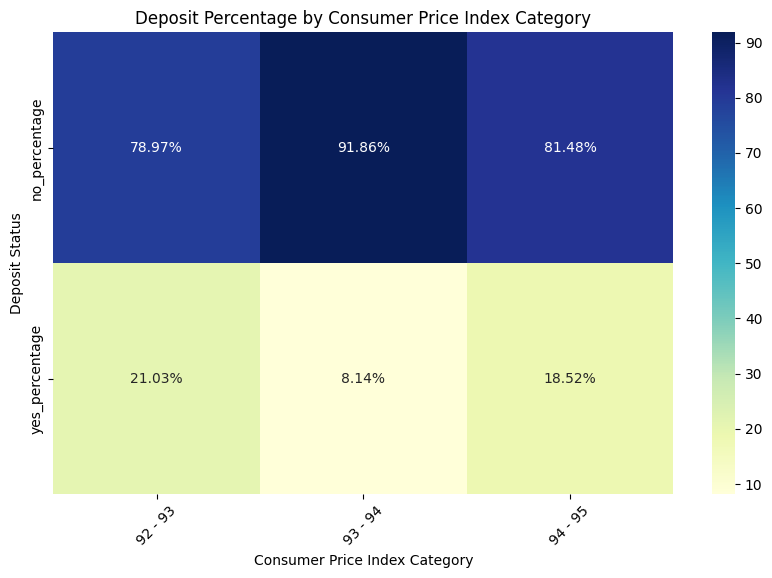

In [ ]:
# Calculate count and percentage based on cons.price.idx_bin category and deposit status
cons_price_idx_counts = df.groupby(['cons.price.idx_bin', 'y']).size().unstack(fill_value=0)
cons_price_idx_counts['Total'] = cons_price_idx_counts.sum(axis=1)
cons_price_idx_counts['no_percentage'] = (cons_price_idx_counts['no'] / cons_price_idx_counts['Total']) * 100
cons_price_idx_counts['yes_percentage'] = (cons_price_idx_counts['yes'] / cons_price_idx_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = cons_price_idx_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for cons.price.idx_bin with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(cons_price_idx_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Consumer Price Index Category')
plt.xlabel('Consumer Price Index Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()


**Explanation**

- **CPI Range 92-93 and 93-94.5:**
  - Global economic uncertainty and prolonged crises during this period led more people to refrain from making deposits. Moderate inflation within this CPI range was not significant enough to drastically change saving behavior, but economic instability drove different spending and investment behaviors.

- **CPI Range 94.5 - 95:**
  - Very low inflation during this period caused more people to opt for making deposits. In low inflation conditions, people feel safer to save their money as a protective measure against the persistent uncertainties around them.

**Additional Notes:**
- Although this analysis shows patterns in the data between CPI and deposit behavior, it is important to note that the relationship between CPI and the decision to make a deposit may not be fully significant or impactful on the target (whether to deposit or not). Therefore, further analysis through machine learning modeling and identification of important features in the dataset will be required to determine the actual influence of CPI on deposit decisions.

### **2.16.3 The Relationship Between Consumer Confidence Index and Deposit Status**

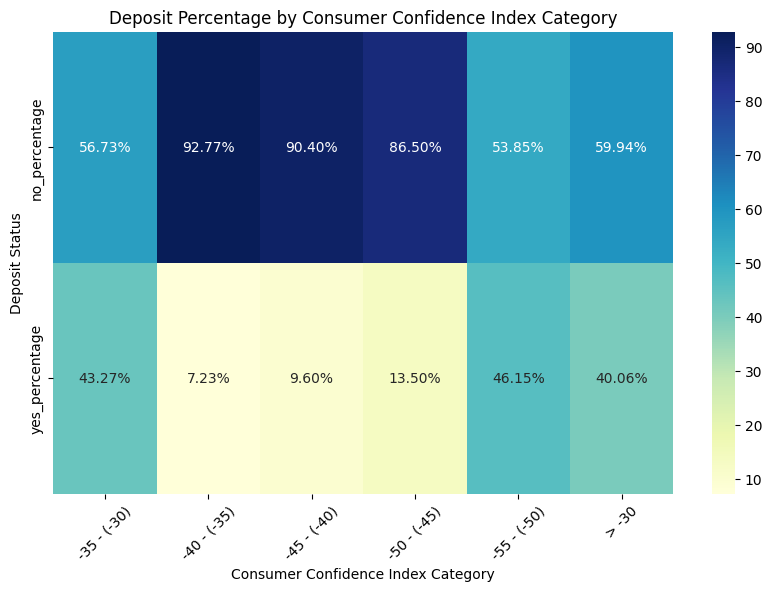

In [ ]:
# Calculate count and percentage based on cons.conf.idx_bin category and deposit status
cons_conf_idx_counts = df.groupby(['cons.conf.idx_bin', 'y']).size().unstack(fill_value=0)
cons_conf_idx_counts['Total'] = cons_conf_idx_counts.sum(axis=1)
cons_conf_idx_counts['no_percentage'] = (cons_conf_idx_counts['no'] / cons_conf_idx_counts['Total']) * 100
cons_conf_idx_counts['yes_percentage'] = (cons_conf_idx_counts['yes'] / cons_conf_idx_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = cons_conf_idx_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for cons.conf.idx_bin with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(cons_conf_idx_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Consumer Confidence Index Category')
plt.xlabel('Consumer Confidence Index Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45)
plt.show()


**Explanation**
- **Higher CCI (Range -40 to -30):**
  - In this CCI range, even though consumer confidence is relatively better compared to other ranges, the proportion of people making deposits remains low. This could be due to ongoing economic uncertainty, which drives people to seek investments or expenditures perceived as more promising than saving.

- **Lower CCI (Range -50 to -40 and -60 to -50):**
  - In the CCI range indicating lower consumer confidence, there is a higher tendency to make deposits. This may reflect increased concerns and economic uncertainty, leading people to prefer saving as a protective measure.

**Additional Notes:**
- It is important to note that the influence of CCI on the decision to deposit may not be fully significant. Therefore, further analysis using machine learning techniques to evaluate key features in the dataset will be needed to understand the actual impact of CCI on deposit decisions.


### **2.16.4 The Influence of Euribor 3 Month Interest Rate on Deposit Decision**

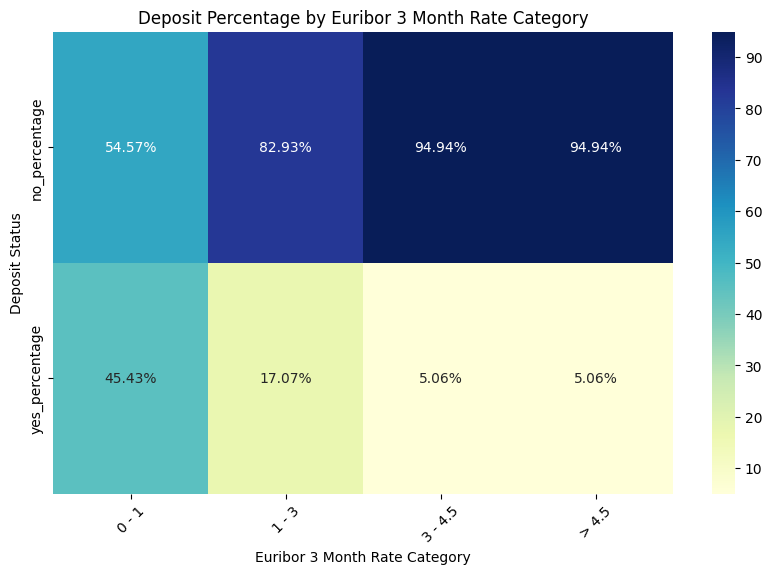

In [ ]:
# Calculate count and percentage based on euribor3m_bin category and deposit status
euribor3m_counts = df.groupby(['euribor3m_bin', 'y']).size().unstack(fill_value=0)
euribor3m_counts['Total'] = euribor3m_counts.sum(axis=1)
euribor3m_counts['no_percentage'] = (euribor3m_counts['no'] / euribor3m_counts['Total']) * 100
euribor3m_counts['yes_percentage'] = (euribor3m_counts['yes'] / euribor3m_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = euribor3m_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for euribor3m_bin with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(euribor3m_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Euribor 3 Month Rate Category')
plt.xlabel('Euribor 3 Month Rate Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45)
plt.show()

**Theory**

**Equilibrium Real Interest Rate**

**What is the equilibrium real interest rate?**  
The equilibrium real interest rate (or neutral rate) is the interest rate that is considered "normal" in the economy. It is the interest rate at which the economy grows steadily, without inflationary or deflationary pressures. In other words, it is the interest rate that is neither too low to spur inflation nor too high to inhibit economic growth.

**Why Are Current Interest Rates (2008-2010) Low?**

1. **Decline in the Equilibrium Real Interest Rate:**  
   - During the global financial crisis and the European debt crisis, the equilibrium real interest rate fell sharply. This means that the "normal" interest rate for stable economic growth has decreased.
   - Currently, the equilibrium real interest rate is even in negative territory in many countries, including the euro area and the U.S. This means that the interest rate required to maintain economic stability is lower than the existing interest rates.

2. **Impact of Excessively High Interest Rates:**  
   - If the interest rates set by central banks are too high compared to the equilibrium real interest rate, the cost of borrowing will be too high.
   - When borrowing costs are too high, individuals and businesses are likely to invest and spend less, which can lead to a downturn in the economy, recessionary pressures, and deflation (falling prices).

**Challenges for the Banking Sector**

- **Low Interest Rates and Banks:**  
  - With low interest rates, banks may face challenges in earning profits from the spread between the interest they pay to depositors and the interest they receive from loans.
  - If interest rates are too low, banks may struggle to balance their income with operational costs, which can affect their stability.

**Conclusion**

The equilibrium real interest rate is an important reference point for monetary policy. When the equilibrium real interest rate declines, central banks must adjust their interest rates to prevent overly low economic growth or uncontrolled inflation. In an environment with very low interest rates, such as the current situation, the banking sector and the economy as a whole face challenges in balancing growth and stability.

**Explanation**

**Relationship and Causes**

From 2008 to 2010, Portugal experienced significant economic turmoil as part of the global financial crisis and the European debt crisis. During this period, an interesting phenomenon occurred where lower interest rates (Euribor 3M) correlated with an increase in term deposits, contrary to the general expectation that higher interest rates would attract more deposits.

**Analysis of the Phenomenon**

**Investor Behavior During the Crisis**

During periods of recession or economic crisis, people's financial behavior tends to change:

1. **Increased Awareness of Saving:** People become more aware of the importance of saving money in anticipation of economic uncertainty.

2. **Preference for Low Risk:** Term deposits become more attractive as they offer minimal risk compared to other investment instruments.

3. **Trade-off Between Liquidity and Security:** Although term deposits are less liquid due to fixed terms (3, 6, 12 months, etc.), investors prioritize the security of their funds.

**Dynamics of Interest Rates and Deposits**

The phenomenon where deposits increase when interest rates are low can be explained as follows:

1. **Lack of Investment Alternatives:** During an economic downturn, other investment options may be limited or deemed too risky.

2. **Deflation Expectations:** In a weak economic environment, people may anticipate falling prices, making real interest rates higher than they appear.

3. **Monetary Policy:** Central banks may lower interest rates to stimulate the economy, while commercial banks continue to offer deposits as a stable source of funding.

4. **Investor Psychology:** Fear of losing money in risky investments drives people to choose deposits, even with lower returns.

### **2.16.5 Correlation Between Number of Jobs and Deposit Status**

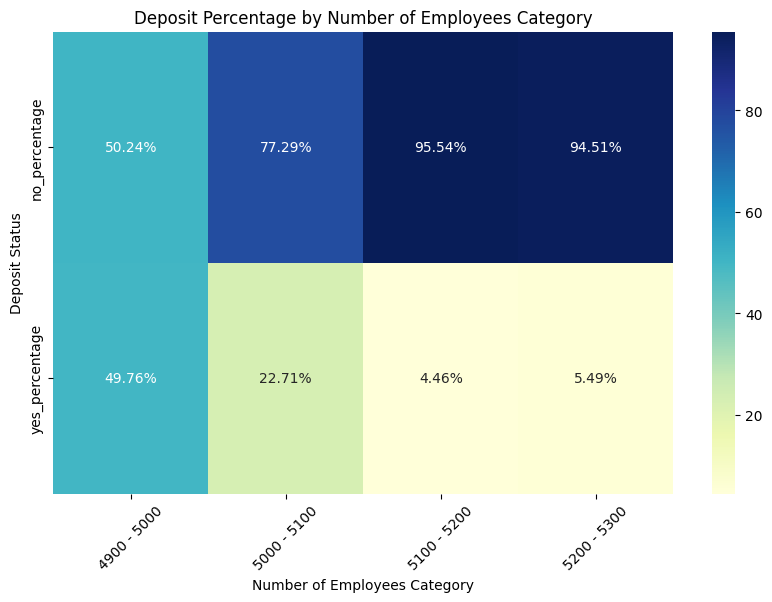

In [ ]:
# Calculate count and percentage based on nr.employed_bin category and deposit status
nr_employed_counts = df.groupby(['nr.employed_bin', 'y']).size().unstack(fill_value=0)
nr_employed_counts['Total'] = nr_employed_counts.sum(axis=1)
nr_employed_counts['no_percentage'] = (nr_employed_counts['no'] / nr_employed_counts['Total']) * 100
nr_employed_counts['yes_percentage'] = (nr_employed_counts['yes'] / nr_employed_counts['Total']) * 100

# Create percentage annotations with % symbol
annotations = nr_employed_counts[['no_percentage', 'yes_percentage']].T
annotations = annotations.applymap(lambda x: f'{x:.2f}%')

# Create heatmap for nr.employed_bin with percentage annotations
plt.figure(figsize=(10, 6))
sns.heatmap(nr_employed_counts[['no_percentage', 'yes_percentage']].T, annot=annotations, cmap="YlGnBu", fmt="")
plt.title('Deposit Percentage by Number of Employees Category')
plt.xlabel('Number of Employees Category')
plt.ylabel('Deposit Status')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()


**Explanation**

- **Number of Employees:**
  - Lower employee count ranges have a higher proportion of deposits, while higher employee counts show a lower proportion of deposits. This indicates that in situations of greater uncertainty or with fewer employees, individuals may be more inclined to save as a precautionary measure.

- **Employment Variation Rate:**
  - There is a relationship between changes in the number of employees and the employment variation rate, which shows how instability in the labor market can affect deposit decisions. In situations where employment fluctuations are high, the proportion of deposits is higher, but as employment fluctuations decrease, the tendency to make deposits declines.

**Additional Notes:**
- While there are noticeable patterns in this data, it is important to conduct further analysis using machine learning techniques to determine the most influential features on deposit decisions. This will provide deeper insights into the relationship between these variables and the decision to make deposits.

# **<span style='color:#E1B12D'> RECOMENDATION </span>**

- **Focus on the elderly group**: Focus the deposit product offerings to the elderly group that shows a higher proportion of interest. By developing products and services that meet their specific needs, implementing effective marketing strategies, and providing adequate customer support, the company can enhance customer satisfaction and drive business growth in this segment. Implementing these recommendations will require collaboration between product development, marketing, and customer service teams to achieve optimal results.

- **General Conclusion: Retired and Student**: Both groups show a high tendency to choose "yes" regardless of their marital status or education. This may be due to their demographic profile and specific needs that make them more open to deposit offers.

  - **Profile and Needs**:
    - **Retired**: Tend to have stable finances and focus more on long-term value.
    - **Student**: Open to new offers and solutions that support their studies.

- **If pursuing higher balances**: Focus on the manager category with higher education. This category shows a relatively high "yes" percentage. Although the number may be smaller, their financial potential tends to be greater due to higher income and balances.

- **Avoid Offering Deposit Products to Customers with Default Status**: Customers in default status show that they are inactive in deposits, and none have deposits in this category. Offering deposit products to customers with default status carries high risk because they may face financial issues and cannot meet deposit commitments. This can lead to low success rates and potential losses for the bank.

- **Consider Financial Stability for Deposit Offers**: Customers who have housing are slightly more likely to have deposits compared to those who do not have housing. Although the difference is not large, targeting customers with housing can slightly increase the likelihood of successful deposit offers. However, the difference is not significant enough to affect marketing strategies on a large scale.

- **Implement Uniform Marketing Strategies for Loan Status**: The deposit percentages between customers with loans and those without loans are almost the same. Therefore, there is no need to adjust marketing strategies based on loan status. Focus on other criteria that have a more significant impact in determining potential customers for deposit products.

- **Focus on Communication via Cellular**: The cellular communication method has proven to be more effective in obtaining approvals for deposit products compared to Telephone. Since Cellular is more practical and can reach customers anywhere, it is advisable to prioritize marketing strategies and product offers through cellular communication to increase success rates.

- **Focus Campaigns on Thursdays**: Thursday shows the highest deposit percentage compared to other days of the week, so campaign efforts should be prioritized on this day. Tuesday and Wednesday also show high deposit levels, while Monday has the lowest deposit percentage. Consider adjusting campaign strategies based on consumer activity patterns throughout the week.

- **Optimize the Number of Contacts**: Although the number of contacts initially increases deposit chances, effectiveness begins to decline after about 5 contacts, and very high numbers (7+) can lead to a decrease in deposit proportions. Focus on the quality of interactions and limit the number of contacts to avoid disturbances and negative impacts on customer perception.

- **Recent Contacts Are More Effective**: Contacts made in the last 0-7 days are most effective in encouraging deposits, with effectiveness decreasing as time since the last contact increases. It is important to make initial contacts, but avoid reaching out more than 5 times to prevent disruption and ensure the quality of communication, as well as consider customer interest from previous contacts before deciding to continue communication.

- **Initial Contacts Are Important and Effective**: Making initial contacts is crucial to increasing deposit chances. A small to moderate number of contacts (1-4 times) improves deposit chances, while a large number of contacts (≥5 times) remains effective but must be managed carefully to avoid disruption and consider customer interest. Making a good first impression is critical, especially if the customer has not been contacted before.

- **Increase Deposit Offers for "Retired" and "Student" Categories**: Focus marketing deposit campaigns on customers who are retired and students during periods of low inflation (CPI 94.5 - 95). Tailor campaign messages to emphasize financial security and protection.

- **Reduce Deposit Offers to Customers with High Employment Fluctuations During Periods of Economic Instability**: Evaluate and reduce deposit product offers to customers with high employment fluctuations during periods of moderate inflation or economic instability (CPI 92-93 and 93-94.5). Shift focus to products that offer higher flexibility.

- **Design deposit products with attractive features that accommodate consumer needs in conditions of economic uncertainty**, such as flexible interest rates or bonuses for long-term savings. Educate customers about the benefits of saving in a low-interest-rate environment as a protection strategy against economic uncertainty. Explain how deposit products can provide the financial stability needed during a crisis. Emphasize the security and protection aspects of deposit products to attract consumers looking for safe solutions amid economic uncertainty.

- **Focus marketing campaigns and deposit product offers on individuals with lower employee counts and amidst high employment fluctuations**, emphasizing stability and security as key features. Adjust strategies to offer products with attractive interest rates and high flexibility.
Here’s the translation into English:

---

Based on the analysis above, here are the recommended strategies for the time deposit product campaign focused on interest rates:

**When Interest Rates Are Low**

1. **Focus on Security**: Emphasize the stability and guarantee of customer funds.
2. **Additional Incentives**: Offer non-interest benefits such as free insurance or priority services.
3. **Variety of Terms**: Provide a range of term options to accommodate various customer needs.

**When Interest Rates Are High**

1. **Highlight Competitiveness**: Showcase returns that are more attractive compared to other investment alternatives.
2. **Long-Term**: Encourage customers to lock in high interest rates with long-term deposits. This will enhance yields.
3. **Product Bundling**: Combine with other banking products to increase added value.


# **<span style='color:#E1B12D'> LIMITATIONS </span>**

Various existing patterns and economic theories that are still unfamiliar require further time to fully understand the context. The complexity of how different economic conditions influence deposit behavior can be quite intricate, and ongoing research and analysis are necessary to gain a comprehensive understanding.

# **<span style='color:#E1B12D'> NEXT STEP </span>**

Further details will emerge from machine learning modeling, where we will also analyze the average values in the context of economic conditions for other categorical features such as job, education, month, and so on. This analysis will provide deeper insights into how these variables affect deposit behavior and help refine our strategies.